<a href="https://colab.research.google.com/github/mehdy28/Financial_crisis_analysis_and_prediction/blob/main/financial_crisis_analysis_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class='alert alert-block alert-info'><h2>Financial Crisis in Africa</h2> </div>

In [1]:
#Importing the necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
#Loeading the data into a dataframe 
url= 'https://raw.githubusercontent.com/mehdy28/Financial_crisis_analysis_and_prediction/main/data/african_crises.csv'
df= pd.read_csv(url)
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [3]:
df.shape

(1059, 14)

We notice that variable that we want to perform predection on (banking_crisis) is composed of categorical variables we try to encode it and change it's values into numerical bianry values : 0,1

In [4]:
#create a dictionary to map the original values to the new encoded values
encoding_dict = {'crisis': 0, 'no_crisis': 1}

#apply the map() function to the banking_crisis column
df['banking_crisis'] = df['banking_crisis'].map(encoding_dict)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

We will be normalizing the numerical variables in order to ensure that they are all on the same scale.

In [6]:
#import the necessary library
from sklearn.preprocessing import MinMaxScaler

#create a list of the variables to be normalized
vars_to_normalize = [col for col in df.columns if df[col].dtype == 'float64' or df[col].dtype == 'int64']
#create a scaler object
scaler = MinMaxScaler()

#fit the scaler to the dataset
scaler.fit(df[vars_to_normalize])

#transform the dataset using the scaler
df[vars_to_normalize] = scaler.transform(df[vars_to_normalize])

In [7]:
df.isnull().sum()

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

We do have no null values

In [8]:
df.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.501649,0.699790,0.077432,0.057961,0.039660,0.152975,0.016006,0.000949,0.776204,0.066100,0.129367,0.911237
std,0.343368,0.217731,0.267401,0.149771,0.195251,0.360133,0.108929,0.030729,0.416984,0.174924,0.335765,0.284536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.202899,0.590909,0.000000,0.000262,0.000000,0.000000,0.000000,0.000001,1.000000,0.000000,0.000000,1.000000
50%,0.536232,0.733766,0.000000,0.001167,0.000000,0.000000,0.000000,0.000002,1.000000,0.000000,0.000000,1.000000
75%,0.797101,0.870130,0.000000,0.011370,0.000000,0.000000,0.000000,0.000002,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


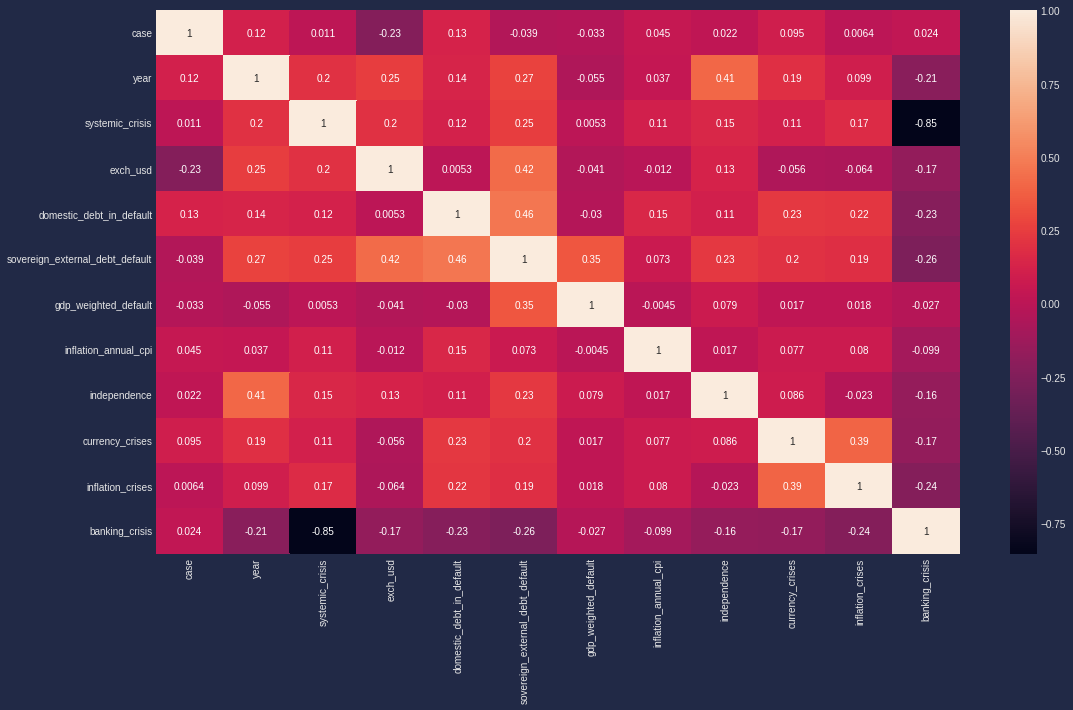

In [23]:
#Checking for correlation
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

# **Exploratory Data Analysis (EDA)**

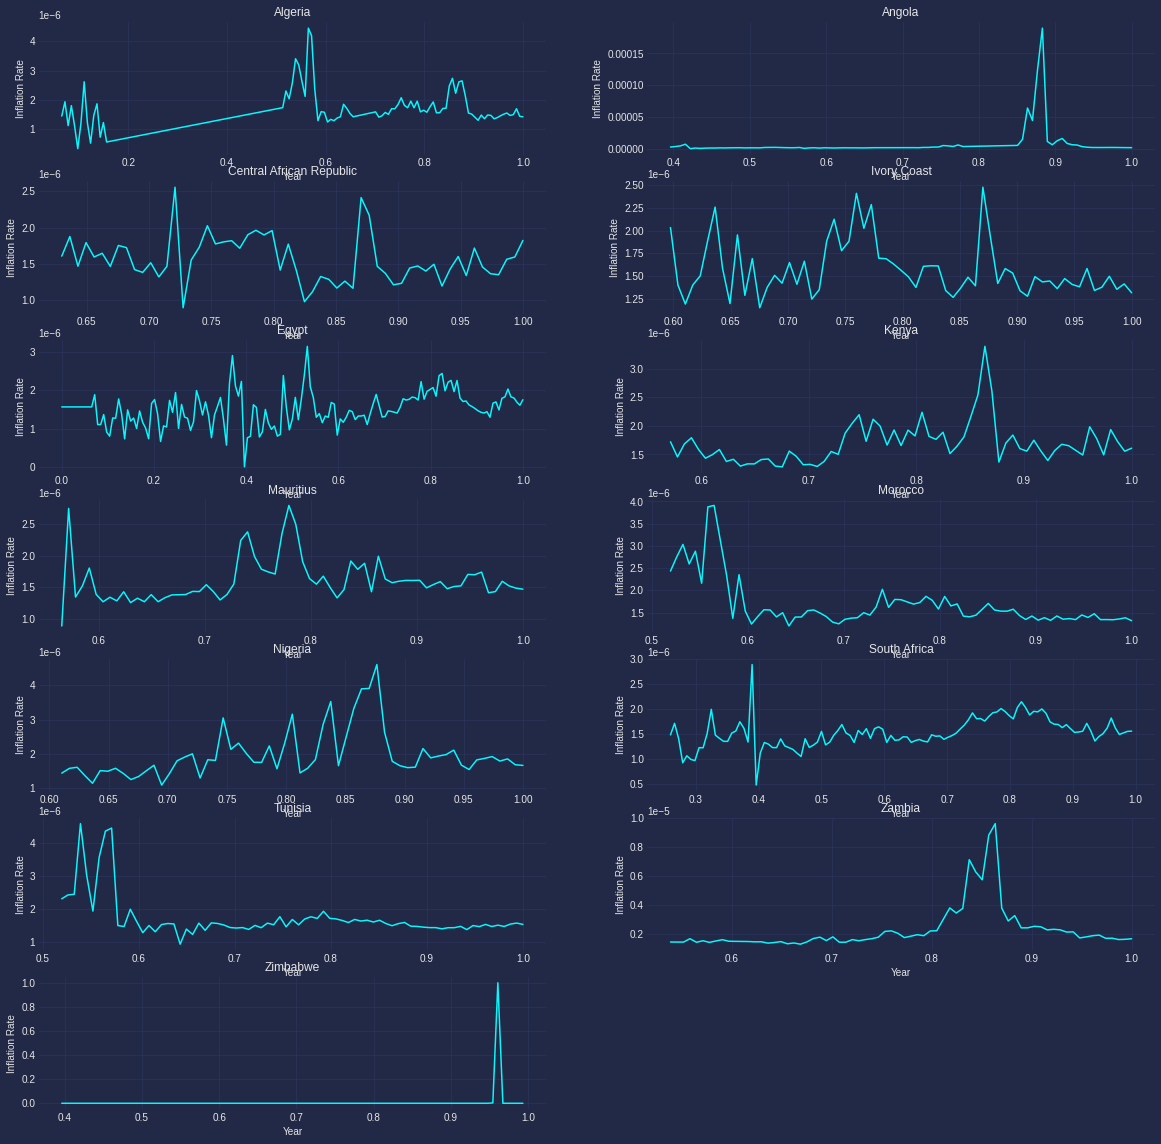

In [28]:
#create subplots
fig, axs = plt.subplots(round (len(df['country'].unique())//2) +1 , 2, figsize=(20,20))

#loop through each country
for i, country in enumerate(df['country'].unique()) :
    #filter the dataframe for the current country
    df_country = df[df['country'] == country]
    #plot the inflation rate over time for the current country
    axs[round(i//2), i%2].plot(df_country['year'], df_country['inflation_annual_cpi'])
    axs[round(i//2), i%2].set_title(country)
    axs[round(i//2), i%2].set_xlabel('Year')
    axs[round(i//2), i%2].set_ylabel('Inflation Rate')
#check if the last subplot is empty and delete it if it is
if not axs[-1, -1].lines:  # if there are no lines in the last subplot, delete it
    fig.delaxes(axs[-1, -1])  # delete the last subplot
plt.show()

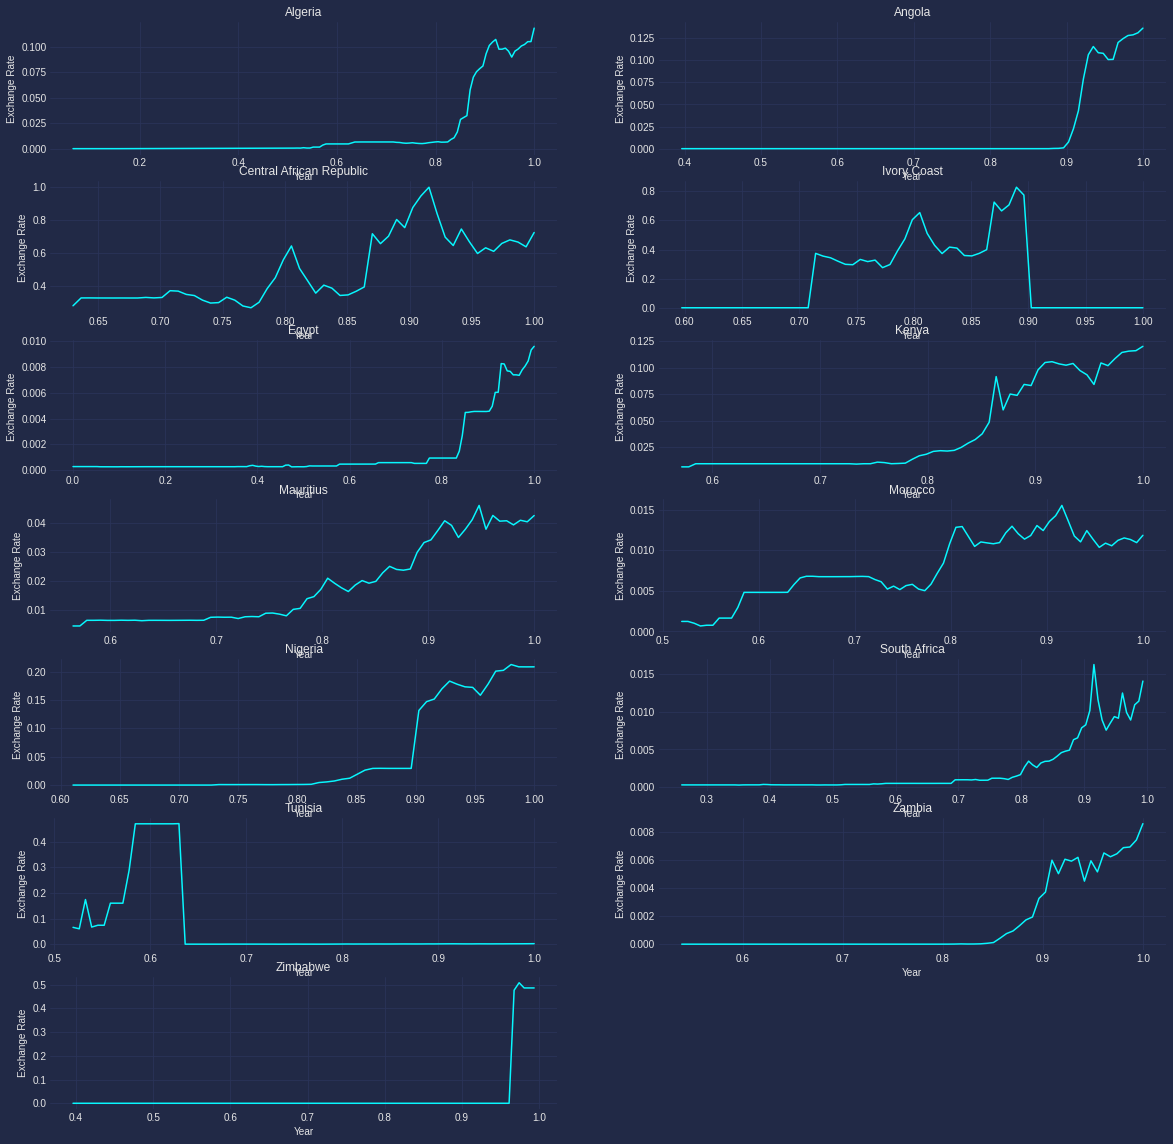

In [30]:
#create subplots
fig, axs = plt.subplots(round (len(df['country'].unique())//2) +1 , 2, figsize=(20,20))

#loop through each country
for i, country in enumerate(df['country'].unique()) :
    #filter the dataframe for the current country
    df_country = df[df['country'] == country]
    #plot the exchange rate over time for the current country
    axs[round(i//2), i%2].plot(df_country['year'], df_country['exch_usd'])
    axs[round(i//2), i%2].set_title(country)
    axs[round(i//2), i%2].set_xlabel('Year')
    axs[round(i//2), i%2].set_ylabel('Exchange Rate')
#check if the last subplot is empty and delete it if it is
if not axs[-1, -1].lines:  # if there are no lines in the last subplot, delete it
    fig.delaxes(axs[-1, -1])  # delete the last subplot
plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [32]:
#Prepare the X and y to perform predection
x=df.drop('banking_crisis',axis=1)
y=df['banking_crisis']

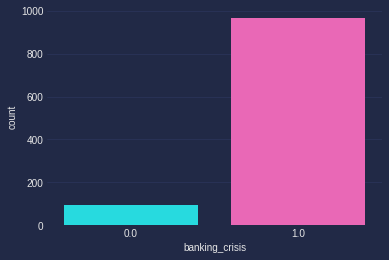

In [33]:
sns.countplot(df['banking_crisis'])
plt.show()

We notice that the number of no banking crises is less that having crises so we will perform an oversampling to it

In [34]:
from imblearn.over_sampling import RandomOverSampler
oversample=RandomOverSampler(sampling_strategy=0.15)
x_over,y_over=oversample.fit_resample(x,y)
print(x_over)
print(y_over)

          case  cc3  country      year  systemic_crisis  exch_usd  \
0     0.000000    3        0  0.064935              1.0  0.000070   
1     0.000000    3        0  0.071429              0.0  0.000071   
2     0.000000    3        0  0.077922              0.0  0.000070   
3     0.000000    3        0  0.084416              0.0  0.000069   
4     0.000000    3        0  0.090909              0.0  0.000069   
...        ...  ...      ...       ...              ...       ...   
1104  0.637681    8        8  0.857143              1.0  0.026396   
1105  0.260870    4        3  0.857143              0.0  0.004486   
1106  0.130435    1        2  0.883117              1.0  0.703608   
1107  0.260870    4        3  0.876623              0.0  0.004555   
1108  0.130435    1        2  0.785714              1.0  0.386131   

      domestic_debt_in_default  sovereign_external_debt_default  \
0                          0.0                              0.0   
1                          0.0       

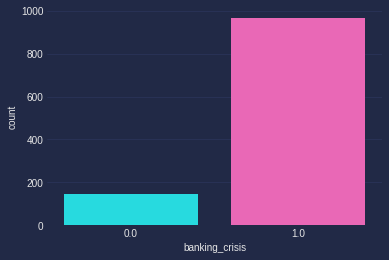

In [35]:
sns.countplot(y_over)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((776, 13), (333, 13), (776,), (333,))

In [38]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [ ]:
a={'Model Name':[],'True Positive':[],'False Negative':[],'False Positive':[],'True Negative':[],'Accuracy':[],'Precision':[],'Recall':[],'F1 Score':[],'Specificity':[],'MCC':[],'ROC_AUC_Score':[],'Balanced Accuracy':[]}
result=pd.DataFrame(a)
result

Model Name:  LogisticRegression()
Confusion matrix : 
 [[291   2]
 [  8  32]]
Outcome values : 
 291 2 8 32
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.99      0.98       293
           0       0.94      0.80      0.86        40

    accuracy                           0.97       333
   macro avg       0.96      0.90      0.92       333
weighted avg       0.97      0.97      0.97       333

Accuracy : 97.0 %
Precision : 97.3 %
Recall : 99.3 %
F1 Score : 0.983
Specificity or True Negative Rate : 80.0 %
Balanced Accuracy : 89.7 %
MCC : MCC
roc_auc_score: 0.897


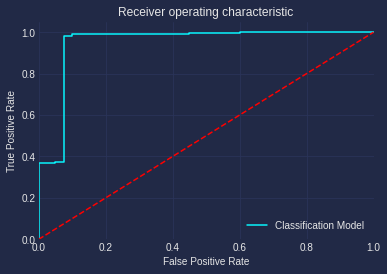

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[  1 292]
 [  3  37]]
Outcome values : 
 1 292 3 37
Classification report : 
               precision    recall  f1-score   support

           1       0.25      0.00      0.01       293
           0       0.11      0.93      0.20        40

    accuracy                           0.11       333
   macro avg       0.18      0.46      0.10       333
weighted avg       0.23      0.11      0.03       333

Accuracy : 11.4 %
Precision : 25.0 %
Recall : 0.3 %
F1 Score : 0.007
Specificity or True Negative Rate : 92.5 %
Balanced Accuracy : 46.4 %
MCC : MCC
roc_auc_score: 0.464


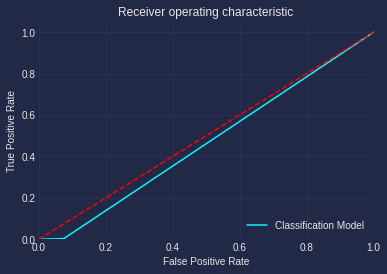

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[286   7]
 [  4  36]]
Outcome values : 
 286 7 4 36
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.98      0.98       293
           0       0.84      0.90      0.87        40

    accuracy                           0.97       333
   macro avg       0.91      0.94      0.92       333
weighted avg       0.97      0.97      0.97       333

Accuracy : 96.7 %
Precision : 98.6 %
Recall : 97.6 %
F1 Score : 0.981
Specificity or True Negative Rate : 90.0 %
Balanced Accuracy : 93.8 %
MCC : MCC
roc_auc_score: 0.938


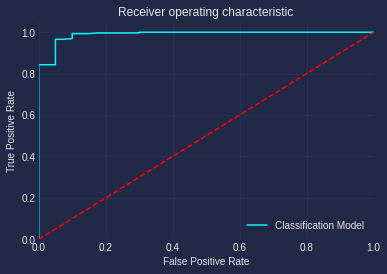

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[288   5]
 [  6  34]]
Outcome values : 
 288 5 6 34
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.98      0.98       293
           0       0.87      0.85      0.86        40

    accuracy                           0.97       333
   macro avg       0.93      0.92      0.92       333
weighted avg       0.97      0.97      0.97       333

Accuracy : 96.7 %
Precision : 98.0 %
Recall : 98.3 %
F1 Score : 0.981
Specificity or True Negative Rate : 85.0 %
Balanced Accuracy : 91.6 %
MCC : MCC
roc_auc_score: 0.916


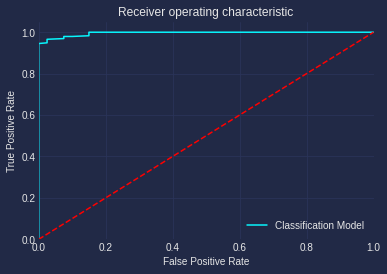

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[289   4]
 [  4  36]]
Outcome values : 
 289 4 4 36
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       293
           0       0.90      0.90      0.90        40

    accuracy                           0.98       333
   macro avg       0.94      0.94      0.94       333
weighted avg       0.98      0.98      0.98       333

Accuracy : 97.6 %
Precision : 98.6 %
Recall : 98.6 %
F1 Score : 0.986
Specificity or True Negative Rate : 90.0 %
Balanced Accuracy : 94.3 %
MCC : MCC
roc_auc_score: 0.943


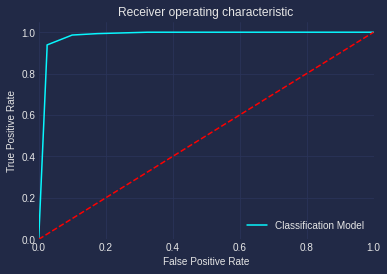

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[291   2]
 [  4  36]]
Outcome values : 
 291 2 4 36
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       293
           0       0.95      0.90      0.92        40

    accuracy                           0.98       333
   macro avg       0.97      0.95      0.96       333
weighted avg       0.98      0.98      0.98       333

Accuracy : 98.2 %
Precision : 98.6 %
Recall : 99.3 %
F1 Score : 0.99
Specificity or True Negative Rate : 90.0 %
Balanced Accuracy : 94.6 %
MCC : MCC
roc_auc_score: 0.947


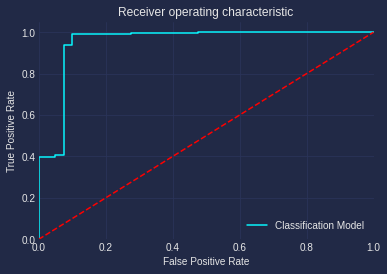

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[  1 292]
 [  0  40]]
Outcome values : 
 1 292 0 40
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.00      0.01       293
           0       0.12      1.00      0.22        40

    accuracy                           0.12       333
   macro avg       0.56      0.50      0.11       333
weighted avg       0.89      0.12      0.03       333

Accuracy : 12.3 %
Precision : 100.0 %
Recall : 0.3 %
F1 Score : 0.007
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.1 %
MCC : MCC
roc_auc_score: 0.502


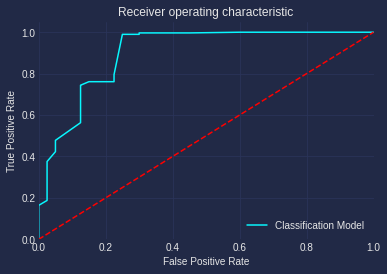

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[281  12]
 [  4  36]]
Outcome values : 
 281 12 4 36
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.96      0.97       293
           0       0.75      0.90      0.82        40

    accuracy                           0.95       333
   macro avg       0.87      0.93      0.90       333
weighted avg       0.96      0.95      0.95       333

Accuracy : 95.2 %
Precision : 98.6 %
Recall : 95.9 %
F1 Score : 0.972
Specificity or True Negative Rate : 90.0 %
Balanced Accuracy : 93.0 %
MCC : MCC
roc_auc_score: 0.93


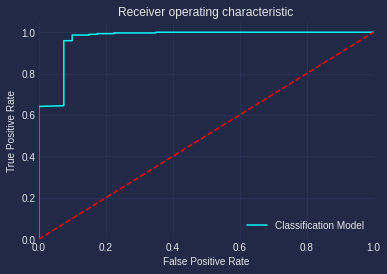

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[289   4]
 [  5  35]]
Outcome values : 
 289 4 5 35
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.99      0.98       293
           0       0.90      0.88      0.89        40

    accuracy                           0.97       333
   macro avg       0.94      0.93      0.94       333
weighted avg       0.97      0.97      0.97       333

Accuracy : 97.3 %
Precision : 98.3 %
Recall : 98.6 %
F1 Score : 0.985
Specificity or True Negative Rate : 87.5 %
Balanced Accuracy : 93.0 %
MCC : MCC
roc_auc_score: 0.931


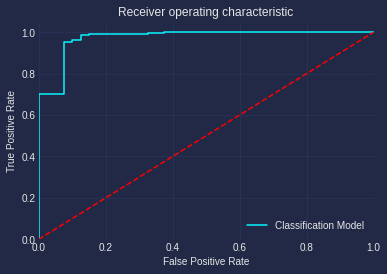

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[  1 292]
 [  0  40]]
Outcome values : 
 1 292 0 40
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.00      0.01       293
           0       0.12      1.00      0.22        40

    accuracy                           0.12       333
   macro avg       0.56      0.50      0.11       333
weighted avg       0.89      0.12      0.03       333

Accuracy : 12.3 %
Precision : 100.0 %
Recall : 0.3 %
F1 Score : 0.007
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.1 %
MCC : MCC
roc_auc_score: 0.502


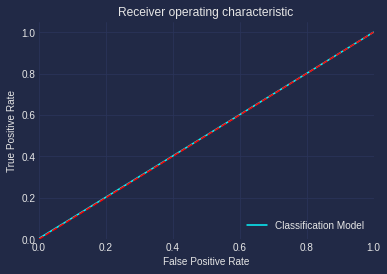

-----------------------------------------------------------------------------------------------------


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

 
MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, ModelSVM, modelBAG,ModelGB, ModelLGB, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    import math
    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', 'MCC')

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True Positive' : tp, 
               'False Negative' : fn, 
               'False Positive' : fp,
               'True Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    result = result.append(new_row, ignore_index=True)

In [41]:
result

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),291.0,2.0,8.0,32.0,0.970,0.973,0.993,0.983,0.800,0.852,0.896587,0.897
1,DecisionTreeClassifier(),1.0,292.0,3.0,37.0,0.114,0.250,0.003,0.007,0.925,-0.214,0.464206,0.464
2,"(DecisionTreeClassifier(max_features='auto', r...",286.0,7.0,4.0,36.0,0.967,0.986,0.976,0.981,0.900,0.849,0.938055,0.938
3,"(ExtraTreeClassifier(random_state=460271914), ...",288.0,5.0,6.0,34.0,0.967,0.980,0.983,0.981,0.850,0.842,0.916468,0.916
4,KNeighborsClassifier(),289.0,4.0,4.0,36.0,0.976,0.986,0.986,0.986,0.900,0.886,0.943174,0.943
5,SVC(probability=True),291.0,2.0,4.0,36.0,0.982,0.986,0.993,0.990,0.900,0.913,0.946587,0.946
6,(DecisionTreeClassifier(random_state=302221919...,1.0,292.0,0.0,40.0,0.123,1.000,0.003,0.007,1.000,0.020,0.501706,0.501
7,([DecisionTreeRegressor(criterion='friedman_ms...,281.0,12.0,4.0,36.0,0.952,0.986,0.959,0.972,0.900,0.795,0.929522,0.930
8,LGBMClassifier(),289.0,4.0,5.0,35.0,0.973,0.983,0.986,0.985,0.875,0.871,0.930674,0.930
9,GaussianNB(),1.0,292.0,0.0,40.0,0.123,1.000,0.003,0.007,1.000,0.020,0.501706,0.501


In [42]:
models={'models':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','ExtraTreesClassifier','KNeighborsClassifier','SVC','BaggingClassifier','GradientBoostingClassifier','LGBMClassifier','GaussianNB']}
out=pd.DataFrame(models)
out['Accuracy']=result['Accuracy']
out['Precision']=result['Precision']
out['Recall']=result['Recall']
out['F1 Score']=result['F1 Score']
out['True Positive']=result['True Positive']
out['False Negative']=result['False Negative']
out['False Positive']=result['False Positive']
out['True Negative']=result['True Negative']
out.sort_values(by=['Accuracy','F1 Score','Recall','Precision'],ascending=False,inplace=True)
out.reset_index(drop=True,inplace=True)
out

,models,Accuracy,Precision,Recall,F1 Score,True Positive,False Negative,False Positive,True Negative
0,SVC,0.982,0.986,0.993,0.990,291.0,2.0,4.0,36.0
1,KNeighborsClassifier,0.976,0.986,0.986,0.986,289.0,4.0,4.0,36.0
2,LGBMClassifier,0.973,0.983,0.986,0.985,289.0,4.0,5.0,35.0
3,LogisticRegression,0.970,0.973,0.993,0.983,291.0,2.0,8.0,32.0
4,ExtraTreesClassifier,0.967,0.980,0.983,0.981,288.0,5.0,6.0,34.0
5,RandomForestClassifier,0.967,0.986,0.976,0.981,286.0,7.0,4.0,36.0
6,GradientBoostingClassifier,0.952,0.986,0.959,0.972,281.0,12.0,4.0,36.0
7,BaggingClassifier,0.123,1.000,0.003,0.007,1.0,292.0,0.0,40.0
8,GaussianNB,0.123,1.000,0.003,0.007,1.0,292.0,0.0,40.0
9,DecisionTreeClassifier,0.114,0.250,0.003,0.007,1.0,292.0,3.0,37.0


In [43]:
models={'models':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','ExtraTreesClassifier','KNeighborsClassifier','SVC','BaggingClassifier','GradientBoostingClassifier','LGBMClassifier','GaussianNB']}
out=pd.DataFrame(models)
out['Accuracy']=result['Accuracy']
out['Precision']=result['Precision']
out['Recall']=result['Recall']
out['F1 Score']=result['F1 Score']
out['True Positive']=result['True Positive']
out['False Negative']=result['False Negative']
out['False Positive']=result['False Positive']
out['True Negative']=result['True Negative']
out.sort_values(by=['Accuracy','F1 Score','Recall','Precision'],ascending=False,inplace=True)
out.reset_index(drop=True,inplace=True)
out

,models,Accuracy,Precision,Recall,F1 Score,True Positive,False Negative,False Positive,True Negative
0,SVC,0.982,0.986,0.993,0.990,291.0,2.0,4.0,36.0
1,KNeighborsClassifier,0.976,0.986,0.986,0.986,289.0,4.0,4.0,36.0
2,LGBMClassifier,0.973,0.983,0.986,0.985,289.0,4.0,5.0,35.0
3,LogisticRegression,0.970,0.973,0.993,0.983,291.0,2.0,8.0,32.0
4,ExtraTreesClassifier,0.967,0.980,0.983,0.981,288.0,5.0,6.0,34.0
5,RandomForestClassifier,0.967,0.986,0.976,0.981,286.0,7.0,4.0,36.0
6,GradientBoostingClassifier,0.952,0.986,0.959,0.972,281.0,12.0,4.0,36.0
7,BaggingClassifier,0.123,1.000,0.003,0.007,1.0,292.0,0.0,40.0
8,GaussianNB,0.123,1.000,0.003,0.007,1.0,292.0,0.0,40.0
9,DecisionTreeClassifier,0.114,0.250,0.003,0.007,1.0,292.0,3.0,37.0


### From the above results, the top model is Support Vector Classifier

In [48]:
y_pred=ModelSVM.predict(x_test)
out=pd.DataFrame({'actual':y_test,'predicted':y_pred})
out=df.merge(out,left_index=True,right_index=True)
out['actual'].replace(1,'no_crisis',inplace=True)
out['actual'].replace(0,'crisis',inplace=True)
out['predicted'].replace(1,'no_crisis',inplace=True)
out['predicted'].replace(0,'crisis',inplace=True)
out[['country','year','banking_crisis','predicted']].sample(10)

,country,year,banking_crisis,predicted
465,5,0.746753,1.0,no_crisis
790,9,0.792208,1.0,no_crisis
58,0,0.831169,1.0,no_crisis
673,8,0.772727,1.0,no_crisis
138,1,0.850649,1.0,no_crisis
1043,12,0.896104,0.0,crisis
677,8,0.798701,1.0,no_crisis
723,9,0.357143,1.0,no_crisis
220,4,0.597403,1.0,no_crisis
321,3,0.246753,1.0,no_crisis
